In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
pl_tracks = pd.read_csv('pl_tracks.csv')

In [59]:
pl_tracks.head()

,pid,track_uri
0,0_0,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI
1,0_0,spotify:track:6I9VzXrHxO9rA9A5euc8Ak
2,0_0,spotify:track:0WqIKmW4BTrj3eJFmnCKMv
3,0_0,spotify:track:1AWQoqb9bSvzTjaLralEkT
4,0_0,spotify:track:1lzr43nnXAijIGYnCT8M8H


In [56]:
tracks = pd.read_csv('tracks.csv')

In [60]:
tracks.head()

,track_name,duration_ms,track_uri,artist_uri,album_uri
0,Lose Control (feat. Ciara & Fat Man Scoop),226863,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,spotify:album:6vV5UrXcfyQD1wu4Qo2I9K
1,Toxic,198800,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,spotify:album:0z7pVBGOD7HCIB7S8eLkLI
2,Crazy In Love,235933,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,spotify:album:25hVFAxTlDvXbx2X2QkUkE
3,Rock Your Body,267266,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,spotify:album:6QPkyl04rXwTGlGlcYaRoW
4,It Wasn't Me,227600,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,spotify:album:6NmFmPX56pcLBOFMhIiKvF


In [30]:
###Duration
1/1000*tracks.loc[:,'duration_ms'].describe() #convert the duration from ms to seconds
tracks[tracks['duration_ms'] == max(tracks['duration_ms'])]

2262198    The Hound of the Baskervilles - Sir Arthur Con...
Name: track_name, dtype: object

Text(0, 0.5, 'Density')

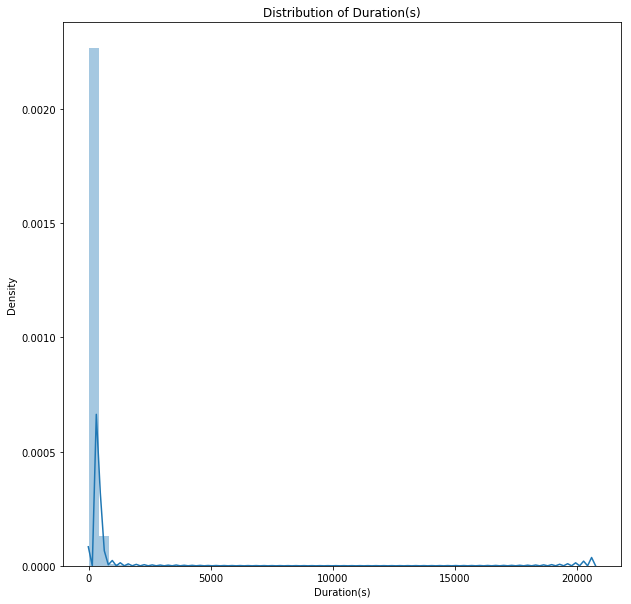

In [48]:
plt.figure(figsize = (10,10))
sns.distplot(tracks.loc[:,'duration_ms']/1000)
#plt.xlim(0, 0.2*1e4)
plt.title('Distribution of Duration(s)')
plt.xlabel('Duration(s)')
plt.ylabel('Density')

Interpretation: Most songs are are below 500 seconds, which is about 8.3 minute long. The mean of the duration is about 247 seconds (4.1167 minutes). The maximum value of duration is about 346 minutes, for the song The Hound of the Baskervilles - Sir Arthur Conan Doyle.

In [69]:
###Artist
artists = pd.read_csv("artists.csv")

In [80]:
#Create a dataframe for the top 10 popular artists that have the most tracks
artist_most_songs = pd.DataFrame({'Artist':tracks['artist_uri'].value_counts()[:10].index.tolist(),'Count':tracks['artist_uri'].value_counts().head(10)})
artist_most_songs.index= range(1,11)

In [81]:
#Merge the artist with most songs dataset with the artist dataset to get the artist names
artist_most_songs_name = pd.merge(artist_most_songs,
                 artists,
                 left_on= 'Artist',
                 right_on = 'artist_uri')
artist_most_songs_name.head()

,Artist,Count,artist_name,artist_uri
0,spotify:artist:5aIqB5nVVvmFsvSdExz408,5417,Johann Sebastian Bach,spotify:artist:5aIqB5nVVvmFsvSdExz408
1,spotify:artist:4NJhFmfw43RLBLjQvxDuRS,5260,Wolfgang Amadeus Mozart,spotify:artist:4NJhFmfw43RLBLjQvxDuRS
2,spotify:artist:2wOqMjp9TyABvtHdOSOTUS,4312,Ludwig van Beethoven,spotify:artist:2wOqMjp9TyABvtHdOSOTUS
3,spotify:artist:7y97mc3bZRFXzT2szRM4L4,3128,Frédéric Chopin,spotify:artist:7y97mc3bZRFXzT2szRM4L4
4,spotify:artist:3MKCzCnpzw3TjUYs2v7vDA,2609,Pyotr Ilyich Tchaikovsky,spotify:artist:3MKCzCnpzw3TjUYs2v7vDA


In [65]:
tracks_art = pd.merge(pl_tracks,tracks[['track_uri','artist_uri']],on ='track_uri',how = 'left')

In [72]:
#Create a dataframe for the top 50 popular artists
top_artist = pd.DataFrame({'Artist':tracks_art['artist_uri'].value_counts()[:50].index.tolist(),'Count':tracks_art['artist_uri'].value_counts().head(50)})
top_artist.index = range(1,51)

In [73]:
#Merge the top_artist dataset with the artist dataset to get the artist names
top_artist_name = pd.merge(top_artist,
                 artists,
                 left_on= 'Artist',
                 right_on = 'artist_uri')
top_artist_name.head()

,Artist,Count,artist_name,artist_uri
0,spotify:artist:3TVXtAsR1Inumwj472S9r4,846937,Drake,spotify:artist:3TVXtAsR1Inumwj472S9r4
1,spotify:artist:5K4W6rqBFWDnAN6FQUkS6x,413297,Kanye West,spotify:artist:5K4W6rqBFWDnAN6FQUkS6x
2,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,353624,Kendrick Lamar,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg
3,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,339570,Rihanna,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H
4,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,316603,The Weeknd,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ


Text(0.5, 0, 'Frequency')

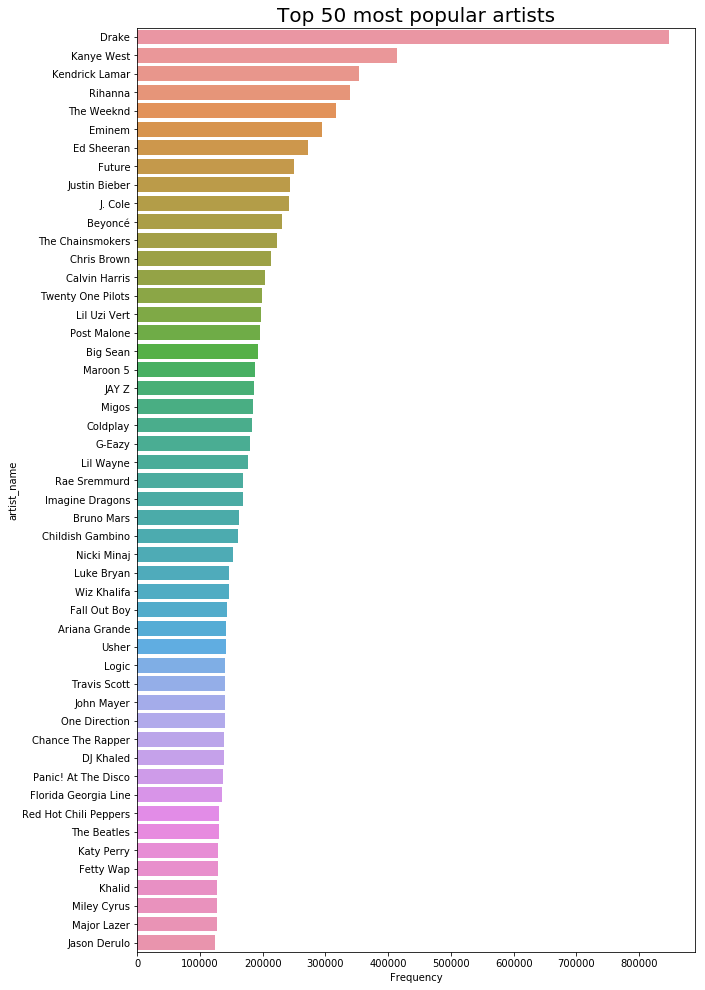

In [74]:
# Plot the top 50 artists
plt.figure(figsize = (10,17))
sns.barplot(x = 'Count',y = 'artist_name', data = top_artist_name)
plt.title('Top 50 most popular artists',fontsize = 20)
plt.xlabel('Frequency' )

Interpretation: The artists that have the most songs collected in the million playlist dataset are Johann Sebastian Bach, Wolfgang Amadeus Mozart, Ludwig van Beethoven, Frédéric Chopin, Pyotr Ilyich Tchaikovsk, Various Artists, Vitamin String Quartet, Grateful Dead, Frank Sinatra, Piano Tribute Players. The top five artists that appear the most frequently in the million playlist dataset are Drake, Kanye West, Kendrick Lamar, Rihanna and The Weekend. It appears that pop song singers are more popular in this dataset even though classifical pianists tend to have more songs in the dataset.

In [87]:
###Album
albums = pd.read_csv("albums.csv")

In [91]:
#Create a dataframe for the top 10 albums that have the most tracks
album_most_songs = pd.DataFrame({'Album':tracks['album_uri'].value_counts()[:10].index.tolist(),'Count':tracks['album_uri'].value_counts().head(10)})
album_most_songs.index = range(1,11)

In [92]:
#Merge the top_artist dataset with the album dataset to get the album names
album_most_songs_name = pd.merge(album_most_songs,
                 albums,
                 left_on= 'Album',
                 right_on = 'album_uri')
album_most_songs_name.head()

,Album,Count,album_name,album_uri
0,spotify:album:082BH67sSIDefLxUp8GgNm,139,"Glee: The Music, The Complete Season Three",spotify:album:082BH67sSIDefLxUp8GgNm
1,spotify:album:52nZGRpZ9wuAsaDCwfadr5,135,Big Vivaldi Box,spotify:album:52nZGRpZ9wuAsaDCwfadr5
2,spotify:album:6WlzaRoDShdgVgaqJRjyNH,131,"Glee: The Music, The Complete Season Two",spotify:album:6WlzaRoDShdgVgaqJRjyNH
3,spotify:album:6tQ1p5gjEujiZGAK10pY1f,129,The Complete Hank Williams,spotify:album:6tQ1p5gjEujiZGAK10pY1f
4,spotify:album:5dw8l7eXBnmGYUIw9riuwT,122,123 Favorite Kids Songs,spotify:album:5dw8l7eXBnmGYUIw9riuwT


In [95]:
#Select the first ten words to represent the album name
album_most_songs_name['album_name'] = [" ".join(i.split()[:10]) for i in album_most_songs_name['album_name']]

In [96]:
album_most_songs_name['album_name'].head()

0    Glee: The Music, The Complete Season Three
1                               Big Vivaldi Box
2      Glee: The Music, The Complete Season Two
3                    The Complete Hank Williams
4                       123 Favorite Kids Songs
Name: album_name, dtype: object

Text(0.5, 0, '# of Tracks')

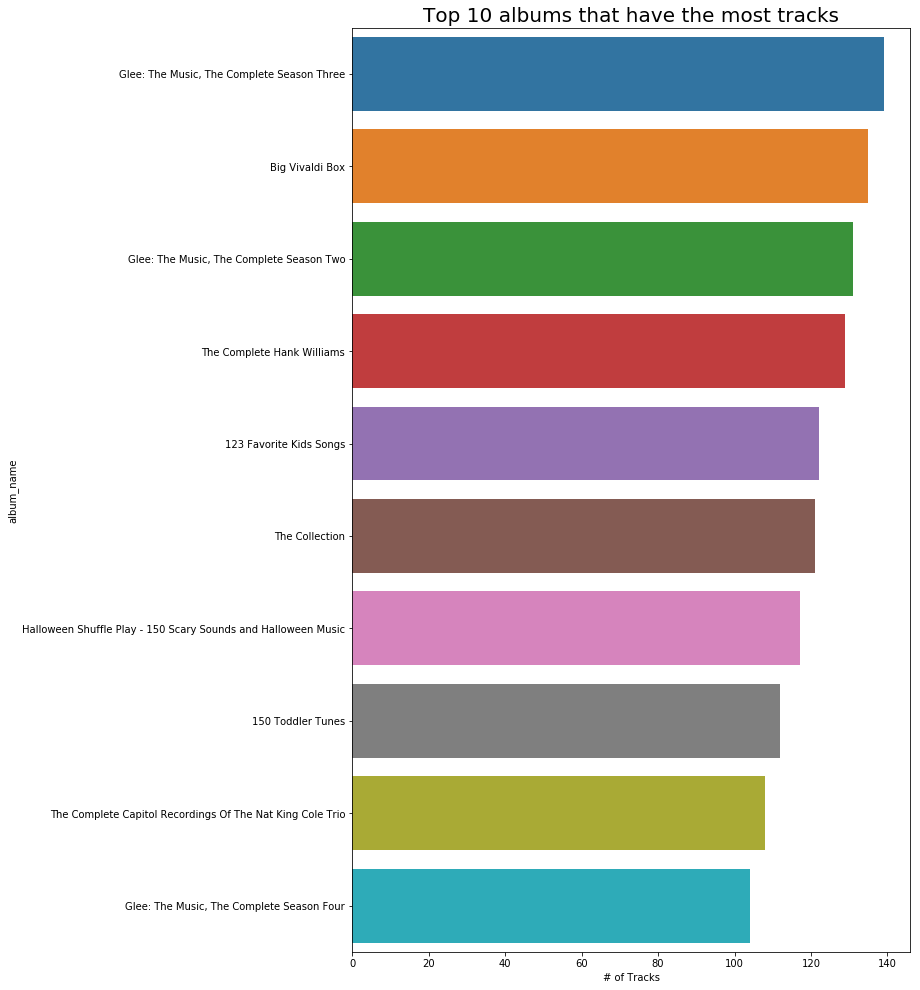

In [99]:
#Plot the top 10 albums that have the most tracks
plt.figure(figsize = (10,17))
sns.barplot(x = 'Count',y = 'album_name', data = album_most_songs_name)
plt.title('Top 10 albums that have the most tracks',fontsize = 20)
plt.xlabel('# of Tracks' )

In [82]:
tracks_alb = pd.merge(pl_tracks,tracks[['track_uri','album_uri']],on ='track_uri',how = 'left')

In [85]:
#Create a dataframe for the top 50 popular albums
top_album = pd.DataFrame({'Album':tracks_alb['album_uri'].value_counts()[:50].index.tolist(),'Count':tracks_alb['album_uri'].value_counts().head(50)})
top_album.index = range(1,51)

In [89]:
#Merge the top_artist dataset with the artist dataset to get the artist names
top_album_name = pd.merge(top_album,
                 albums,
                 left_on= 'Album',
                 right_on = 'album_uri')
top_album_name.head()

,Album,Count,album_name,album_uri
0,spotify:album:5s0rmjP8XOPhP6HhqOhuyC,156488,Stoney,spotify:album:5s0rmjP8XOPhP6HhqOhuyC
1,spotify:album:4eLPsYPBmXABThSJ821sqY,141638,DAMN.,spotify:album:4eLPsYPBmXABThSJ821sqY
2,spotify:album:71QyofYesSsRMwFOTafnhB,133050,Coloring Book,spotify:album:71QyofYesSsRMwFOTafnhB
3,spotify:album:6kf46HbnYCZzP6rjvQHYzg,120946,American Teen,spotify:album:6kf46HbnYCZzP6rjvQHYzg
4,spotify:album:2AvupjUeMnSffKEV05x222,120017,Culture,spotify:album:2AvupjUeMnSffKEV05x222


Text(0.5, 0, 'Frequency')

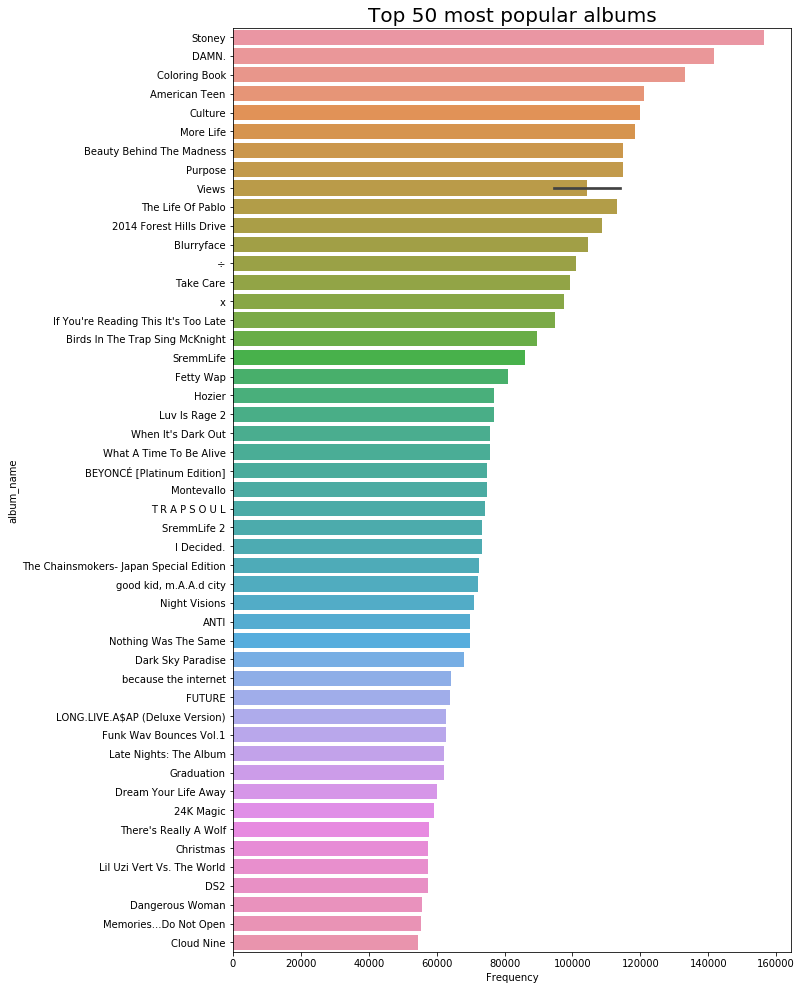

In [90]:
# Plot the top 50 albums
plt.figure(figsize = (10,17))
sns.barplot(x = 'Count',y = 'album_name', data = top_album_name)
plt.title('Top 50 most popular albums',fontsize = 20)
plt.xlabel('Frequency' )

Interpretation: According to this distribution plot, we can see that the glee albums have the most tracks, followed by albums such as Big Vivaldi Box, 123 Favorite Kids Songs. In terms of popularity, Stoney, DAMN, Coloring Book, American Teen, and Culture are the top 5 albums that have tracks appear the most frequently in the playlist population. These albums are by Post Malone, Kendrick Lamar, Khalid, Migos and so on who also appear to be the popular artists.